In [14]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats


from jupyterthemes import jtplot
jtplot.style()

In [11]:
df = pd.read_csv("lrcxclean.csv")

In [12]:
df.head()

,date,open,high,low,close,volume
0,1990-03-26,1.3643,1.4635,1.3128,1.4635,656100
1,1990-03-27,1.4119,1.5111,1.4119,1.4635,603900
2,1990-03-28,1.4377,1.4635,1.4119,1.4635,1009800
3,1990-03-29,1.4377,1.4873,1.4377,1.4377,313200
4,1990-03-30,1.4377,1.4635,1.4377,1.4635,453600


In [15]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [18]:
df.set_index('date').sort_index()

,open,high,low,close,volume
date,,,,,
1990-03-26,1.3643,1.4635,1.3128,1.4635,656100
1990-03-27,1.4119,1.5111,1.4119,1.4635,603900
1990-03-28,1.4377,1.4635,1.4119,1.4635,1009800
1990-03-29,1.4377,1.4873,1.4377,1.4377,313200
1990-03-30,1.4377,1.4635,1.4377,1.4635,453600
...,...,...,...,...,...
2021-09-29,586.1100,588.9999,566.8500,567.5100,1643969
2021-09-30,573.2900,577.5300,567.9275,569.1500,1081135
2021-10-01,571.1200,573.6500,560.6000,569.7300,1111165


In [37]:
df[df.date >= "2017-12-31"]

,date,open,high,low,close,volume
6998,2018-01-02,173.4524,177.5463,172.2533,177.3215,2037307
6999,2018-01-03,178.6330,181.5747,177.6400,180.3381,2583342
7000,2018-01-04,182.6801,184.4132,180.9470,181.1625,2227207
7001,2018-01-05,182.5864,184.7224,182.1649,183.9917,1712974
7002,2018-01-08,183.9261,186.8864,183.8511,185.3782,2762693
...,...,...,...,...,...,...
7940,2021-09-29,586.1100,588.9999,566.8500,567.5100,1643969
7941,2021-09-30,573.2900,577.5300,567.9275,569.1500,1081135
7942,2021-10-01,571.1200,573.6500,560.6000,569.7300,1111165
7943,2021-10-04,565.9700,566.5000,548.3300,550.1400,1639537


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7945 non-null   datetime64[ns]
 1   open    7945 non-null   float64       
 2   high    7945 non-null   float64       
 3   low     7945 non-null   float64       
 4   close   7945 non-null   float64       
 5   volume  7945 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 372.5 KB


In [77]:
df.date[0].year

1990

In [38]:
three_year_df = df[df.date >= "2017-12-31"]

In [79]:
three_year_df['year'] = three_year_df.date.apply(lambda x: x.year)

In [80]:
three_year_df

,date,open,high,low,close,volume,year
6998,2018-01-02,173.4524,177.5463,172.2533,177.3215,2037307,2018
6999,2018-01-03,178.6330,181.5747,177.6400,180.3381,2583342,2018
7000,2018-01-04,182.6801,184.4132,180.9470,181.1625,2227207,2018
7001,2018-01-05,182.5864,184.7224,182.1649,183.9917,1712974,2018
7002,2018-01-08,183.9261,186.8864,183.8511,185.3782,2762693,2018
...,...,...,...,...,...,...,...
7940,2021-09-29,586.1100,588.9999,566.8500,567.5100,1643969,2021
7941,2021-09-30,573.2900,577.5300,567.9275,569.1500,1081135,2021
7942,2021-10-01,571.1200,573.6500,560.6000,569.7300,1111165,2021
7943,2021-10-04,565.9700,566.5000,548.3300,550.1400,1639537,2021


<AxesSubplot:xlabel='date', ylabel='close'>

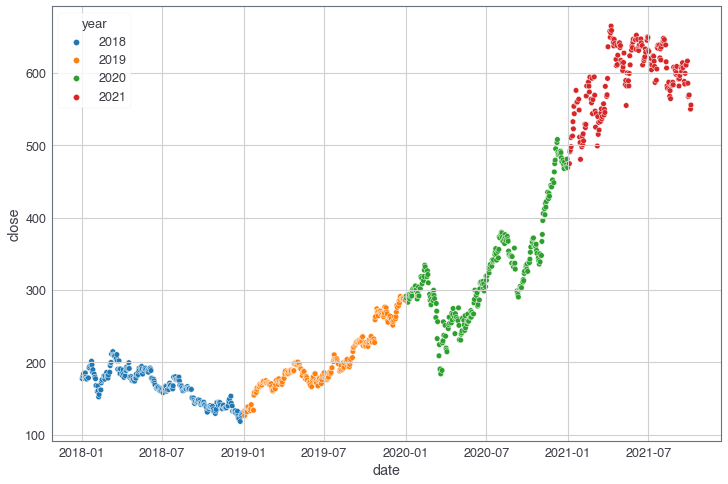

In [85]:
jtplot.style(figsize=(15,10),theme='grade3')
sns.scatterplot(data=three_year_df,x='date',y='close',hue='year', palette='tab10')

In [ ]:
#'oceans16', 'grade3', 'chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'.